# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

In [2]:
def f_samp():     # Rejection technique
    c = np.random.random()
    r = np.random.random()
    if r < 1.564*(1-(np.pi*c)**2/8+(np.pi*c)**4/384):
        return c
    else:
        return -1

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)
    
def prog_sums(n_block, array, array_squared):
    """ Return progresive sums with statistical uncertainties evaluated with data-blocking
    Par:
    n_blocks:
        Number of blocks
    array:
        Array
    array_squared:
        Array Squared
        
    Returns:
    sum_prog, err_prog
    """
    sum_prog = np.zeros(n_block)
    su2_prog = np.zeros(n_block)
    err_prog = np.zeros(n_block)
    for i in range(n_block):
        for j in range(i+1):
            sum_prog[i] += array[j] # SUM_{j=0,i} r_j
            su2_prog[i] += array_squared[j] # SUM_{j=0,i} (r_j)^2
        sum_prog[i]/=(i+1) # Cumulative average
        su2_prog[i]/=(i+1) # Cumulative square average
        err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    return sum_prog, err_prog

Sia: 
<center> $g(x)=cos(\frac{\pi x}{2})$, $p(x)=1$
<br><br>
Per usare l'importance sampling la distribuzione di probabilità scelta deve soddisfare $d(x)>0$, pertanto ho scelto uno sviluppo al secondo ordine di $cos(x)$: <br><br>

<center><font size='3'> 
    $cos(\frac{\pi x}{2}) \approx 1-\frac{(\pi x)^2}{8}+\frac{(\pi x)^4}{384} = d(x)$ <br><br>   $d(x)>0 \forall x \in [0,1] $
    
Normalizzo la distribuzione a 1:
<center><font size='3'> 
    $\int_{0}^{1}\lambda d(x)\,dx = 1 \rightarrow \lambda = \frac{1}{1-\frac{\pi^2}{24}+\frac{\pi^4}{1920}} \approx 1.564$
<br>

Per calcolare la varianza $\sigma^2 = <(\frac{g(x)p(x)}{d(x)})^2> - I^2$ :
    
<center> $<g(x)p(x)^2> = \int_{0}^{1}(\frac{g(x)p(x)}{d(x)})^2d(x)\,dx = \int_{0}^{1}\frac{g(x)^2}{d(x)}\,dx$
<br><br>
    
    
Stima dell'ultimo integrale è:
    <center> $P = \frac{1}{N}\sum_{i=0}^{N}\frac{g(x_i)^2}{d(x_i)}$ dove $x_i \sim d(x)$

In [3]:
b = 1
a = 0
M = 10**4
N = 100
f = 0
g = 0

I1 = np.zeros(N)
Is1 = np.zeros(N)
I2 = np.zeros(N)
P = np.zeros(N)

np. random.seed(22)

for j in range(N):
    f = 0
    g = 0
    p = 0
    fs = 0
    for k in range(int(M/N)):
        r = np.random.random()    # Numero random per il punto 1
        s = f_samp()              # Numero random per il punto 2
        while s==-1:
            s = f_samp()
        f += np.pi/2*np.cos(np.pi*r/2)          # Somma nella stima dell'integrale da distribuzione uniforme
        fs += (np.pi/2*np.cos(np.pi*r/2))**2    # '' al quadrato
        g += np.pi/2*np.cos(np.pi*s/2)/1.564/(1-(np.pi*s)**2/8+(np.pi*s)**4/384)       # Somma con Importance sampling
        p += (np.pi/2*np.cos(np.pi/2*s)/(1-(np.pi*s)**2/8+(np.pi*s)**4/384)/1.564)**2  # Somma per P nel calcolo della varianza (imprtance sampling) 
        
    I1[j] = (b-a)*f/(M/N)   # Stima integrale punto 1
    Is1[j] = fs/(M/N)       # '' al quadrato
    I2[j] = g/(M/N)         # Stima integrale punto 2
    P[j] = p/(M/N)          # Stima di P per il calcolo della varianza
        
# Ottengo somme progressive ed errore da blocking method

int_1, int_err_1 = prog_sums(N, I1, Is1)
int_2, int_err_2 = prog_sums(N, I2, P)

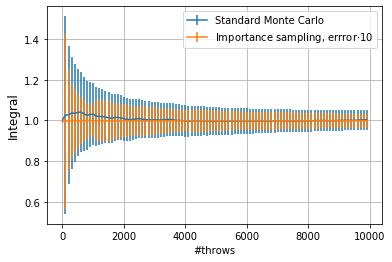

In [4]:
x = np.arange(N)
x *= int(M/N)

# Plot
plt.errorbar(x, int_1, yerr=int_err_1, label='Standard Monte Carlo')
plt.errorbar(x, int_2, yerr=int_err_2*10, label='Importance sampling, errror$\cdot$10')
plt.xlabel('#throws')
plt.ylabel('Integral', fontsize=12)
plt.grid(True)
plt.legend()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

In [5]:
# Funzione per il fit
import scipy.optimize as optimize

def rad(x,k):
    return k*np.sqrt(x)

In [6]:
def get_traj(length=100, dim=3, mode='discrete'):
    """Generate a RW in d dimensions
    
    Parameters
    ----------
    length: int
        Length of the RW.
    dim: int
        Dimension of the RW

    mode: 'discrete', 'continuos'
        Walker steps type
    Returns
    -------
    traj : np.ndarray, (length, dim)
        The positions of the RW.
    
    """
    assert mode == 'discrete' or mode == 'continuos'
    
    traj = np.zeros((length, dim))
    for j in range(length) :
        if mode == 'discrete':
            asse = np.random.randint( 0, dim-1)
            dir = np.random.choice( (-1, 1) )
            if j==0  :
                pass
            else :
                traj[j,:] = traj[j-1,:]
                traj[j,asse] = traj[j,asse] + dir
        else:
            theta = np.random.uniform(0., 180.)
            phi = np.random.uniform(0., 360.)
            if j==0  :
                pass
            else :
                traj[j,:] = traj[j-1,:]
                traj[j,0] += np.cos(theta)*np.cos(phi)
                traj[j,1] += np.cos(theta)*np.sin(phi)
                traj[j,2] += np.sin(theta)
        
    return traj

**Discrete cubic lattice with step length a=1:**

In [36]:
n_RD = 10**4
N = 10        # Numero di blocchi
steps = 100
sums = np.zeros(steps)
dist = np.zeros(steps)
mean_d = np.zeros((N,steps))
mean_d_squared = np.zeros((N,steps))
discr_avg = np.zeros((steps,N))
discr_err = np.zeros((steps,N))

np.random.seed(50)

for i in range(N):
    sums = np.zeros(steps)
    dist = np.zeros(steps)
    for j in range(int(n_RD/N)):        # Loop sugli steps in un blocco
        RD = get_traj(length=steps+1, mode='discrete')  # produco il Random-walk
        for k in range(steps):
            dist[k] = RD[k+1][0]**2 + RD[k+1][1]**2 + RD[k+1][2]**2     # Calcolo la distanza dall'origine nello step k
            sums[k] += dist[k]                                    # sommo tutte le distanze nel singolo step k
    mean_d[i] = np.sqrt(sums/(n_RD/N))     # Valuto la media in ogni step in un blocco
    mean_d_squared[i] = mean_d[i]**2       # '' al quadrato

for i in range(steps):       # statistical uncertainty for each steps with block average
    discr_avg[i], discr_err[i] = prog_sums(N, mean_d[:,i], mean_d_squared[:,i])         

In [37]:
# Fit dei risultati con f(N) = k*sqrt(N)
x = np.arange(1,steps+1, 1)
k_discr, _ = optimize.curve_fit(rad, x, ydata=discr_avg[:,-1])

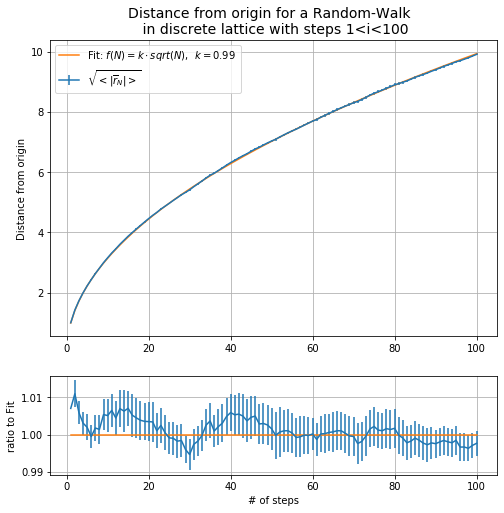

In [38]:
# Plot

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [3,1]}, figsize=(8,8))
ax1.set_title('Distance from origin for a Random-Walk  \n in discrete lattice with steps 1<i<100', fontsize=14)

ax1.errorbar(x, discr_avg[:,-1], yerr=discr_err[:,-1], label='$\sqrt{<|\overline{r}_N|>}$')
ax1.plot(x, rad(x, k_discr), label='Fit: $f(N)=k \cdot sqrt(N)$,  $k={:.2f}$ '.format(k_discr[0]))
ax1.set_ylabel('Distance from origin')
ax1.grid(True)
ax1.legend()

ax2.errorbar(x, discr_avg[:,-1]/rad(x, k_discr), yerr=discr_err[:,-1]/rad(x, k_discr))
ax2.plot(x, np.ones(len(x)))
ax2.set_xlabel('# of steps')
ax2.set_ylabel('ratio to Fit')
ax2.grid(True)

**Continuum lattice with step of length a=1**

In [39]:
n_RD = 10**4
N = 10
steps = 100
sums = np.zeros(steps)
dist = np.zeros(steps)
mean_c = np.zeros((N,steps))
mean_c_squared = np.zeros((N,steps))
cont_avg = np.zeros((steps,N))
cont_err = np.zeros((steps,N))

np.random.seed(99)

for i in range(N):
    sums = np.zeros(steps)
    dist = np.zeros(steps)
    for j in range(int(n_RD/N)):         # Loop sugli steps in un blocco
        RD = get_traj(length=steps+1, mode='continuos')           # produco il Random-walk
        for k in range(steps):
            dist[k] = RD[k+1][0]**2 + RD[k+1][1]**2 + RD[k+1][2]**2   # Calcolo la distanza dall'origine nello step k
            sums[k] += dist[k]                                  # sommo tutte le distanze nel singolo step k
    mean_c[i] = np.sqrt(sums/(n_RD/N))    # Valuto la media in ogni step in un blocco
    mean_c_squared[i] = mean_c[i]**2    # '' al quadrato

for i in range(steps):       # statistical uncertainty for each steps with block average
    cont_avg[i], cont_err[i] = prog_sums(N, mean_c[:,i], mean_c_squared[:,i])

In [40]:
# Fit dei risultati con f(N) = k*sqrt(N)
x = np.arange(1,steps+1, 1)
k_cont, _ = optimize.curve_fit(rad, x, ydata=cont_avg[:,-1])

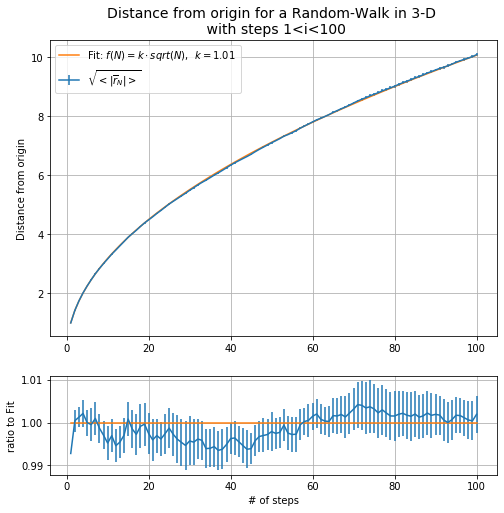

In [41]:
# Plot

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [3,1]}, figsize=(8,8))
ax1.set_title('Distance from origin for a Random-Walk in 3-D \n with steps 1<i<100', fontsize=14)

ax1.errorbar(x, cont_avg[:,-1], yerr=cont_err[:,-1], label='$\sqrt{<|\overline{r}_N|>}$')
ax1.plot(x, rad(x, k_cont), label='Fit: $f(N)=k \cdot sqrt(N)$,  $k={:.2f}$ '.format(k_cont[0]))
ax1.set_ylabel('Distance from origin')
ax1.grid(True)
ax1.legend()

ax2.errorbar(x, cont_avg[:,-1]/rad(x, k_cont), yerr=cont_err[:,-1]/rad(x, k_cont))
ax2.plot(x, np.ones(len(x)))
ax2.set_xlabel('# of steps')
ax2.set_ylabel('ratio to Fit')
ax2.grid(True)

My results are compatible with a diffusive behavior indeed in a diffusion process the mean squared distance as a function of time is:
    <center> $<r^2(t)> = 2Dt$
    
with D the diffusion constant.
My results are in accord with this expressions with $D\approx1/2$.